In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.fft import rfft

In [2]:


def extract_features(signal: np.ndarray):
    """Extrait les features d'une séquence numpy 1D"""
    features = [
        np.mean(signal),
        np.std(signal),
        np.min(signal),
        np.max(signal),
        skew(signal),
        kurtosis(signal),
        np.sum(signal**2),  # énergie
        np.argmax(np.abs(rfft(signal))),  # fréquence dominante (en index, pas Hz)
    ]
    return features

def dataframe_to_features(data_name: str, df: pd.DataFrame):
    """Transforme un DataFrame de séries (chaque ligne = un exemple) en DataFrame de features"""
    features_list = []
    for i, row in df.iterrows():
        features = extract_features(row.values)
        features_list.append(features)
    features_df = pd.DataFrame(
        features_list,
        columns=[
            data_name + "_mean", data_name + "_std", data_name + "_min", data_name + "_max", 
            data_name + "_skew", data_name + "_kurtosis", data_name + "_energy", data_name + "_freq_peak"
        ]
    )
    return features_df

pressure = pd.read_table('datas/PS2.txt', header=None)
flow = pd.read_table('datas/FS1.txt', header = None)
profile = pd.read_table('datas/profile.txt', header = None)

In [ ]:

pressure_features = dataframe_to_features("pressure",pressure)
flow_feature = dataframe_to_features("flow",flow)
X = pd.concat([pressure_features, flow_feature], axis=1)
valve_condition = profile.iloc[:, 1].values
y = valve_condition

In [ ]:
pressure.columns = [f'pressure_{i}' for i in range(pressure.shape[1])]
flow.columns = [f'flow_{i}' for i in range(flow.shape[1])]
valve_condition = profile.iloc[:, 1].values
X = pd.concat([pressure, flow], axis=1)
y = valve_condition

In [3]:

valve_condition = profile.iloc[:, 1].values
pressure.columns = [f'pressure_{i}' for i in range(pressure.shape[1])]
flow.columns = [f'flow_{i}' for i in range(flow.shape[1])]
pressure_features = dataframe_to_features("pressure",pressure)
flow_feature = dataframe_to_features("flow",flow)
X = pd.concat([pressure, flow, pressure_features, flow_feature], axis=1)
y = valve_condition

pressure_max     0.114391
pressure_940     0.076931
pressure_948     0.066094
flow_98          0.059301
flow_291         0.042201
pressure_981     0.035130
flow_391         0.033967
flow_392         0.032362
flow_293         0.031526
flow_103         0.029567
pressure_982     0.028199
flow_107         0.026135
pressure_996     0.025312
flow_194         0.024633
pressure_3290    0.024262
flow_101         0.024215
pressure_1008    0.023886
pressure_3596    0.023279
pressure_998     0.022993
pressure_3954    0.022902
pressure_4727    0.021974
pressure_985     0.021608
pressure_1341    0.021462
pressure_980     0.021269
flow_294         0.021154
flow_396         0.020086
pressure_5833    0.019959
flow_422         0.019956
flow_196         0.019768
flow_197         0.019757
dtype: float64
MSE : 0.038513097678452526
R² : 0.9996474135304251


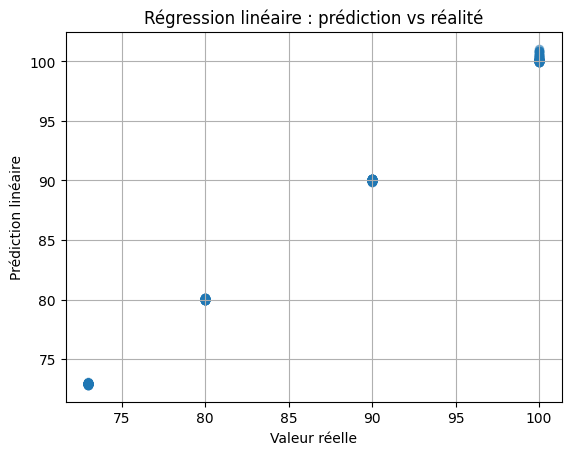

In [6]:
n_train = 2000
X_train = X.iloc[:n_train]
X_test = X.iloc[n_train:]

y_train = y[:n_train]
y_test = y[n_train:]
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


coefs = model.coef_
feature_names = X.columns

importances = pd.Series(np.abs(coefs), index=feature_names)
print(importances.sort_values(ascending=False).head(30))
# On garde l’ordre d’origine
importances = importances[feature_names]

# plt.figure(figsize=(8,4))
# plt.bar(feature_names, importances)
# plt.xticks(rotation=45, ha='right')
# plt.ylabel('Importance (|coefficient|)')
# plt.title('Importance des variables')
# plt.tight_layout()
# plt.show()


print("MSE :", mean_squared_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valeur réelle")
plt.ylabel("Prédiction linéaire")
plt.title("Régression linéaire : prédiction vs réalité")
plt.grid(True)
plt.show()


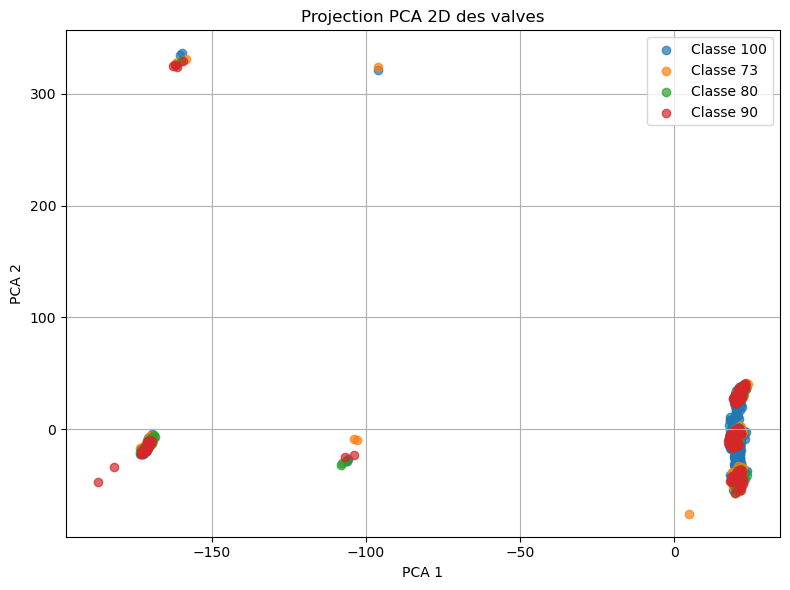

Composante 1 : 52.23% de la variance expliquée
Composante 2 : 20.79% de la variance expliquée
Composante 3 : 8.70% de la variance expliquée
Composante 4 : 1.70% de la variance expliquée
Composante 5 : 1.21% de la variance expliquée
Composante 6 : 1.06% de la variance expliquée
Composante 7 : 0.85% de la variance expliquée
Composante 8 : 0.71% de la variance expliquée
Composante 9 : 0.51% de la variance expliquée
Composante 10 : 0.32% de la variance expliquée

Composante principale 1:
flow_391    0.016934
flow_392    0.016921
flow_409    0.016920
flow_403    0.016918
flow_464    0.016917
dtype: float64

Composante principale 2:
pressure_4970    0.025425
pressure_4972    0.025422
pressure_4969    0.025421
pressure_4973    0.025420
pressure_4971    0.025418
dtype: float64

Composante principale 3:
flow_499    0.031522
flow_500    0.031102
flow_502    0.031037
flow_501    0.030555
flow_498    0.030273
dtype: float64

Composante principale 4:
pressure_119    0.058756
pressure_138    0.05868

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.values)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

df_visu = pd.DataFrame({
    'PCA1': X_pca[:, 0],
    'PCA2': X_pca[:, 1],
    'profile': valve_condition.values.flatten()
})


# Affichage scatter
plt.figure(figsize=(8, 6))
for label in df_visu['profile'].unique():
    plt.scatter(
        df_visu[df_visu['profile'] == label]['PCA1'],
        df_visu[df_visu['profile'] == label]['PCA2'],
        label=f'Classe {label}', alpha=0.7
    )
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Projection PCA 2D des valves')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Composante {i+1} : {var*100:.2f}% de la variance expliquée")


import pandas as pd
import numpy as np

# Suppose que X est ton DataFrame original des features (colonnes nommées !)
feature_names = X.columns
components = pca.components_  # shape: (n_components, n_features)

for i, comp in enumerate(components):
    loading = pd.Series(comp, index=feature_names)
    # Affiche les top variables (en valeur absolue)
    print(f"\nComposante principale {i+1}:")
    print(loading.abs().sort_values(ascending=False).head(5))




In [30]:
print(X.shape)
print(X_pca.shape)
print(profile.shape)

(2205, 16)
(2205, 2)
(2205, 5)


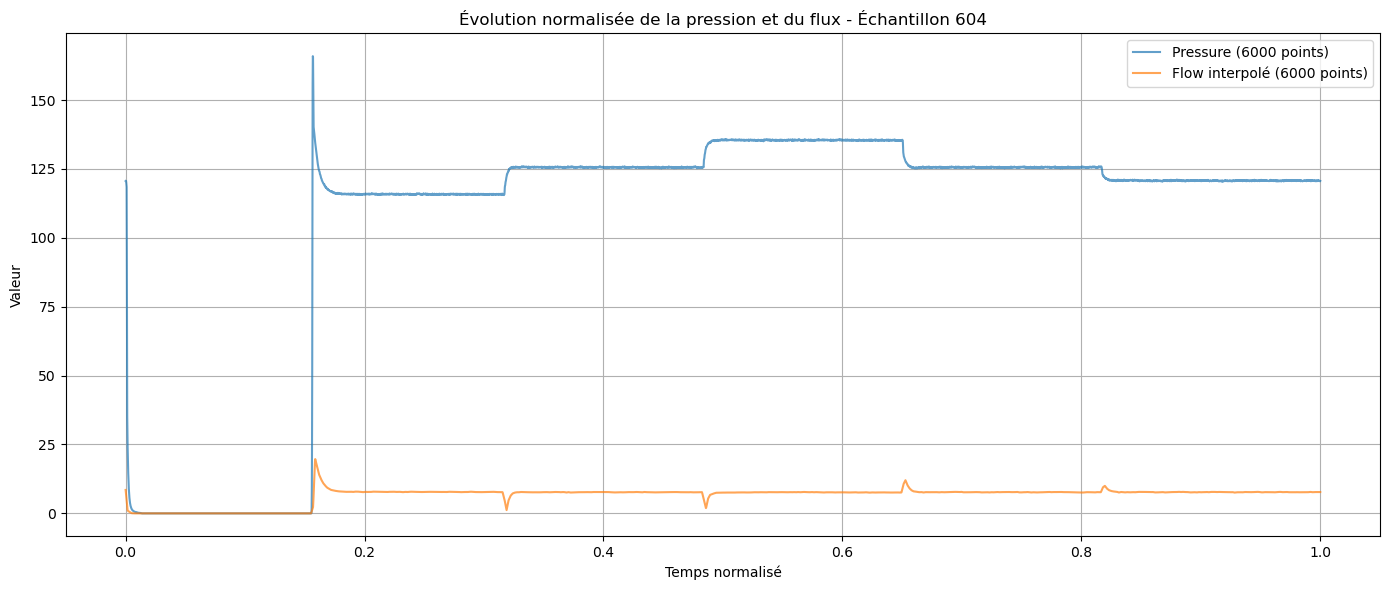

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Sélection d'un échantillon (ex : ligne 0)
# i = 255
i=604
pressure_sample = pressure.iloc[i].values
flow_sample = flow.iloc[i].values

# Créer un vecteur temps pour chaque série
t_pressure = np.linspace(0, 1, len(pressure_sample))  # 6000 points
t_flow = np.linspace(0, 1, len(flow_sample))          # 600 points

# Interpolation linéaire du flow pour qu'il ait aussi 6000 points
interpolator = interp1d(t_flow, flow_sample, kind='linear')
flow_sample_interp = interpolator(t_pressure)

# Tracé
plt.figure(figsize=(14, 6))
plt.plot(t_pressure, pressure_sample, label='Pressure (6000 points)', alpha=0.7)
plt.plot(t_pressure, flow_sample_interp, label='Flow interpolé (6000 points)', alpha=0.7)
plt.xlabel("Temps normalisé")
plt.ylabel("Valeur")
plt.title(f"Évolution normalisée de la pression et du flux - Échantillon {i}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd

pressure = pd.read_table('datas/PS2.txt', header=None).values    # shape: (N_cycles, 6000)
flow = pd.read_table('datas/FS1.txt', header=None).values        # shape: (N_cycles, 600)
profile = pd.read_table('datas/profile.txt', header=None)
valve_condition = profile.iloc[:, 1].values

Number_rows, n_points_ps2 = pressure.shape
_, n_points_fs1 = flow.shape

# Interpolation de FS1 à la même fréquence que PS2
fs1_interp = np.zeros_like(pressure)
for i in range(Number_rows):
    x_old = np.linspace(0, 1, n_points_fs1)
    x_new = np.linspace(0, 1, n_points_ps2)
    fs1_interp[i] = np.interp(x_new, x_old, flow[i])

# Empilement en deux canaux
X = np.stack([pressure, fs1_interp], axis=1)  # shape: (N_cycles, 2, n_points_ps2)
y = valve_condition

# Normalisation simple
X = (X - X.mean(axis=(0,2), keepdims=True)) / (X.std(axis=(0,2), keepdims=True) + 1e-7)

In [17]:
class ValveDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)  # Pour classification
        # Remapping pour classes continues (100, 90, 80, 73) -> (0,1,2,3)
        unique = sorted(np.unique(y))
        self.y = torch.tensor([unique.index(v) for v in y], dtype=torch.long)
    def __len__(self): return self.X.shape[0]
    def __getitem__(self, idx): return self.X[idx], self.y[idx]

In [19]:
n_train = 2000
X_train = X[:n_train]
X_test = X[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]
train_dataset = ValveDataset(X_train, y_train)
test_dataset = ValveDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

Epoch 1 - loss: 1.1711
Epoch 2 - loss: 0.9363
Epoch 3 - loss: 1.3385
Epoch 4 - loss: 0.8034
Epoch 5 - loss: 0.4979
Epoch 6 - loss: 0.2946
Epoch 7 - loss: 0.3578
Epoch 8 - loss: 0.2410
Epoch 9 - loss: 0.0592
Epoch 10 - loss: 0.0649
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        73

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



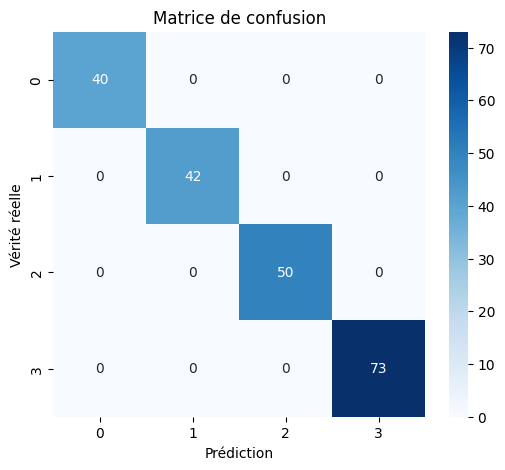

In [20]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleValveCNN(nn.Module):
    def __init__(self, n_classes=4):
        super().__init__()
        self.conv1 = nn.Conv1d(2, 16, kernel_size=15, stride=3)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=9, stride=3)
        self.conv3 = nn.Conv1d(32, 64, kernel_size=5, stride=3)
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(64, n_classes)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = self.pool(x).squeeze(-1)
        x = self.fc(x)
        return x
    


device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = SimpleValveCNN(n_classes=4).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()

# Entraînement rapide
for epoch in range(10):
    model.train()
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        logits = model(Xb)
        loss = criterion(logits, yb)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} - loss: {loss.item():.4f}")

# Test
model.eval()
all_preds, all_targets = [], []
with torch.no_grad():
    for Xb, yb in test_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        preds = model(Xb).argmax(1)
        all_preds.extend(preds.cpu().numpy())
        all_targets.extend(yb.cpu().numpy())

from sklearn.metrics import classification_report
print(classification_report(all_targets, all_preds))

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul de la matrice de confusion
cm = confusion_matrix(all_targets, all_preds)

# Affichage avec seaborn (plus joli)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Prédiction')
plt.ylabel('Vérité réelle')
plt.title('Matrice de confusion')
plt.show()


ValueError: x and y must be the same size

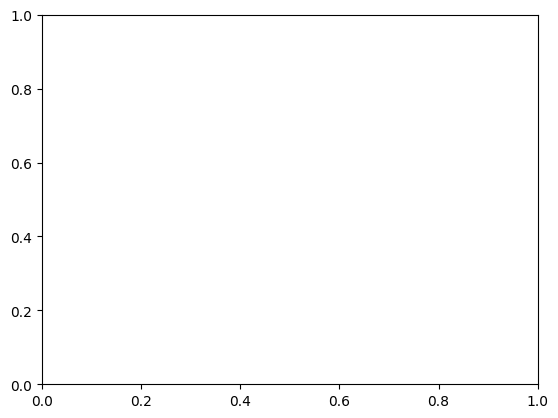

In [12]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valeur réelle")
plt.ylabel("Prédiction linéaire")
plt.title("Régression linéaire : prédiction vs réalité")
plt.grid(True)
plt.show()